In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df=pd.read_csv('train.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(313)

In [5]:
df=df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [7]:
df['Engine volume'].value_counts()

Engine volume
2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
5.4 Turbo       1
0.3 Turbo       1
5.2             1
5.8             1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [8]:
df['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 18924, dtype: object

In [9]:
df['engine_volume_float'] = df['Engine volume'].str.extract(r'(\d+\.?\d*)')
df

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_6408\3775073788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_volume_float'] = df['Engine volume'].str.extract(r'(\d+\.?\d*)')


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,2


In [10]:
df['engine_volume_float'] = pd.to_numeric(df['engine_volume_float'])

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_6408\2809431862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_volume_float'] = pd.to_numeric(df['engine_volume_float'])


In [11]:
df['mileage_number'] = df['Mileage'].str.extract(r'(\d+)').astype(int)
df

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_6408\68650477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage_number'] = df['Mileage'].str.extract(r'(\d+)').astype(int)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,186005
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,192000
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,200000
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,168966
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,91901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0,300000
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4,161600
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2.0,116365
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,2.0,51258


In [12]:
df1=df[['engine_volume_float','mileage_number','Price']]
df1

,engine_volume_float,mileage_number,Price
0,3.5,186005,13328
1,3.0,192000,16621
2,1.3,200000,8467
3,2.5,168966,3607
4,1.3,91901,11726
...,...,...,...
19232,2.0,300000,8467
19233,2.4,161600,15681
19234,2.0,116365,26108
19235,2.0,51258,5331


In [13]:
df1.skew()

engine_volume_float      2.208051
mileage_number          38.578517
Price                  135.387726
dtype: float64

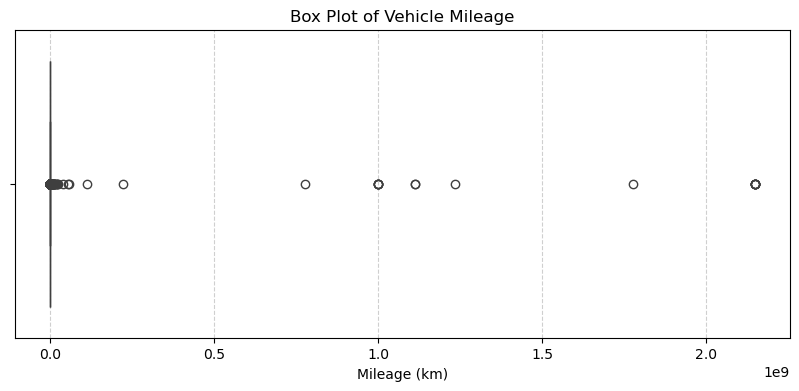

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['mileage_number'])
plt.title('Box Plot of Vehicle Mileage')
plt.xlabel('Mileage (km)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [15]:
df1.shape

(18924, 3)

In [16]:
df1[df1['mileage_number']>500000000]

,engine_volume_float,mileage_number,Price
985,1.6,777777777,2700
2278,1.6,2147483647,6899
5456,3.3,999999999,12544
6157,1.8,2147483647,5959
7724,1.2,1234567899,4800
9524,1.8,1111111111,50
10667,1.5,999999999,6476
11901,2.0,2147483647,10036
12591,1.8,999999999,2600
12734,2.4,2147483647,2200


In [17]:
df1 = df1[df1['mileage_number'] < 500000000]

In [18]:
df1.shape

(18907, 3)

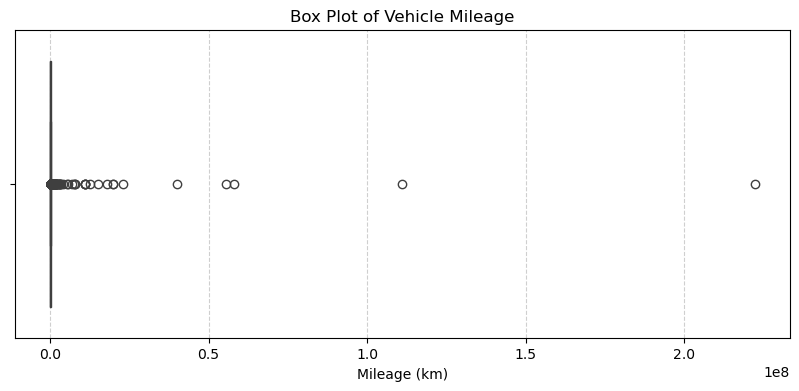

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['mileage_number'])
plt.title('Box Plot of Vehicle Mileage')
plt.xlabel('Mileage (km)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [20]:
df1[df1['mileage_number']>200000]

,engine_volume_float,mileage_number,Price
6,1.8,258909,1803
7,2.4,216118,549
8,2.5,398069,1098
12,1.6,350000,3000
18,3.3,295059,549
...,...,...,...
19225,1.7,236000,8781
19226,3.0,220000,7840
19227,3.5,219030,29793
19230,1.8,307325,470


In [21]:
df1 = df1[df1['mileage_number'] < 200000]

In [22]:
df1.shape

(14742, 3)

In [23]:
df1.skew()

engine_volume_float      1.569765
mileage_number          -0.158357
Price                  119.690452
dtype: float64

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df1['engine_volume_float'] = pt.fit_transform(df1[['engine_volume_float']])
df1['Price'] = pt.fit_transform(df1[['Price']])


In [25]:
df1.skew()

engine_volume_float   -0.107180
mileage_number        -0.158357
Price                  0.433565
dtype: float64

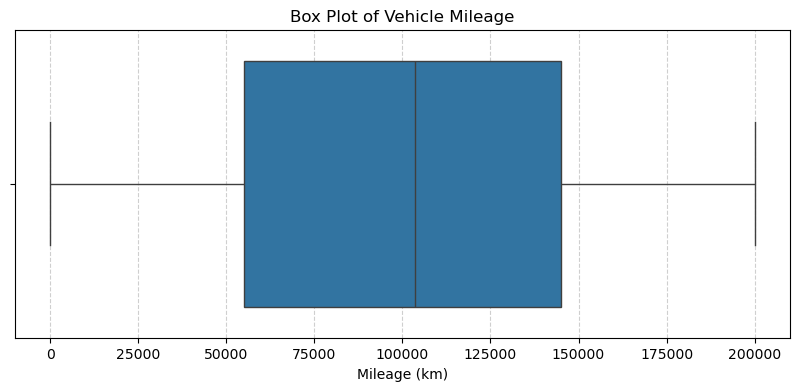

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['mileage_number'])
plt.title('Box Plot of Vehicle Mileage')
plt.xlabel('Mileage (km)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [27]:
corr=df1.corr()

In [28]:
corr

,engine_volume_float,mileage_number,Price
engine_volume_float,1.000000,0.069455,0.085803
mileage_number,0.069455,1.000000,-0.070463
Price,0.085803,-0.070463,1.000000


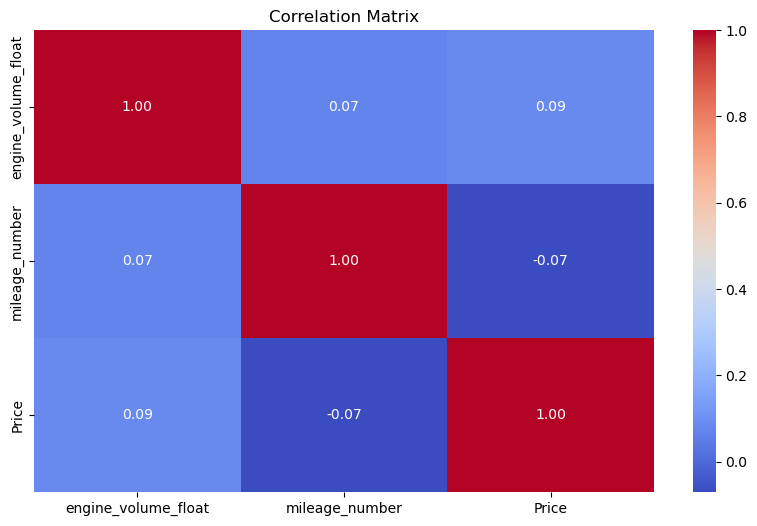

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

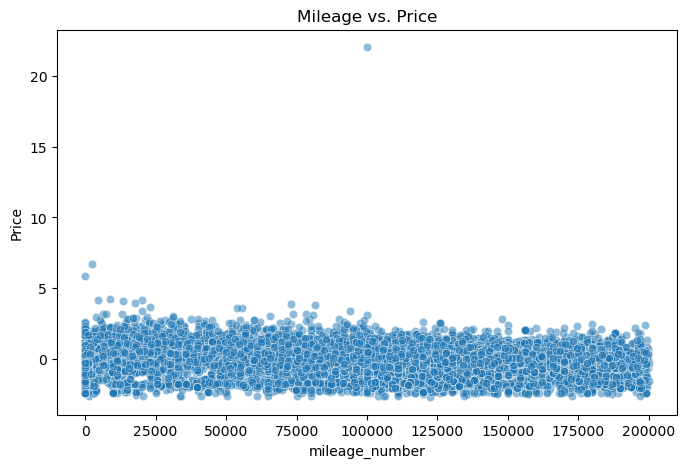

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage_number', y='Price', data=df1, alpha=0.5)
plt.title('Mileage vs. Price')
plt.show()

In [31]:
X=df1[['mileage_number','engine_volume_float']]
y=df1['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
predictions = model.predict(X_test)

In [33]:
r2_score = model.score(X_test, y_test)
r2_score

0.008708755342343277

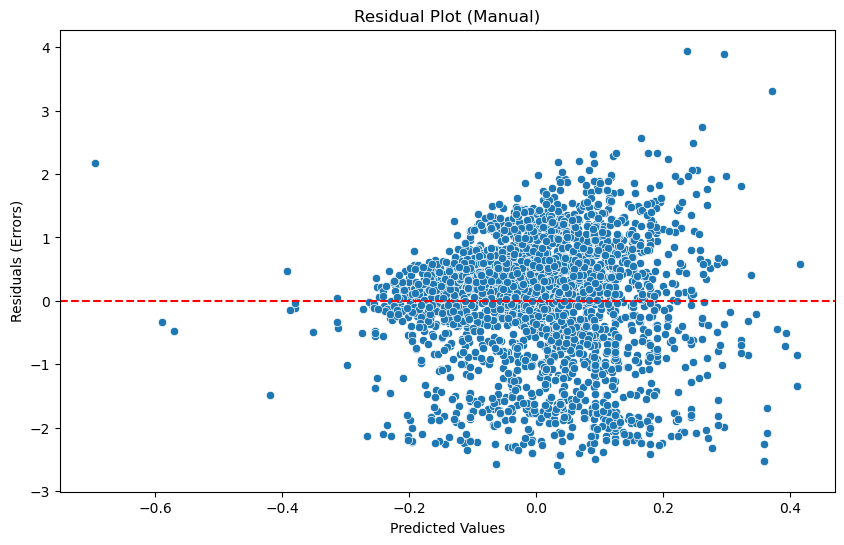

In [34]:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Manual)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.show()